# Introduction to Linear Regression

## Learning Objectives

After doing this section, you'll understand the following:
- Concepts behind Linear Regression
- Differences between Simple Linear Regression and Multiple Linear Regression
- Applications of Linear Regression

## Import Libraries

We begin with the following code to import the necessary libraries.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Overview of Linear Regression

Linear Regression has been around for 200 years (since 1805-1809). Linear Regression is one of the fundamental machine learning algorithms due to its simplicity and interpretation. It is used to study the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. You may ask that real-world data are never linear, so why do we need to learn Linear Regression?

Despite its simplicity, Linear Regression is extremely useful both conceptually and practically. Linear Regression is a good starting point for regression tasks where you can use it to predict or visualize the relationship between different variables. In addition, it can be extended to model more complicated patterns in data. You will learn about these later in this course.

In the following contents, we will start with a walk-through of the mathematics behind two types of Linear Regression (i.e., Simple Linear Regression and Multiple Linear Regression), before moving on to build your own model and extend it to account real-world data.

## Simple Linear Regression

Simple Linear Regression gets it adjective "simple" because it considers only one independent variable. In constrast, Multiple Linear Regression, which we'll study later, considers two or more independent variables.

Simple Linear Regression assumes that the relationship between an independent variable $x$ and a dependent variable $y$ is linear. It can be modeled as a straight-line:

$$y = b + a x$$
where, $b$ is commonly known as the *intercept*, and $a$ is commonly known as the *slope*.

Here is an example of a straight-line fit to the data:

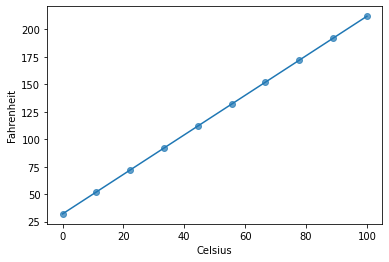

In [2]:
celsius_values = np.linspace(0, 100, 10)
fahrenheit_values = (9 / 5) * celsius_values + 32

plt.scatter(celsius_values, fahrenheit_values, alpha=0.7)
plt.plot(celsius_values, fahrenheit_values)
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit");

We can see that the relationship between degrees Fahrenheit and degrees Celsius is linear. It actually can be formulate as follows:

$$F = \frac{9}{5}C + 32$$

Here are some examples of other linear relationships that you might familiar with:
- Conversion between centimeters and inches 
- Exchange rates between Japanese Yen and other currencies 
- Diameter of a given circle and the circle’s  circumference 

In the above figure, it is important to note that the observed data points fall directly on a line. However, real data are dirty and noisy, and the relationship between the variables is not perfect. Let's consider the following data, which is scattered about a line with a slope of -3 and an intercept of 5.

Shape of x: (100, 1)
The first 5 rows of x: [[0.22733602]
 [0.31675834]
 [0.79736546]
 [0.67625467]
 [0.39110955]]

Shape of y: (100, 1)
The first 5 rows of y: [[4.48662078]
 [4.28986904]
 [3.38791148]
 [3.17500358]
 [4.3787223 ]]


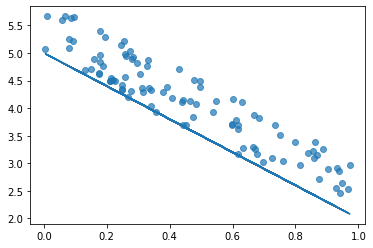

In [3]:
num_data_points = 100

# get a new instance of random numbers generator
rng = np.random.default_rng(seed=12345)

# generate x
x = rng.random(size=(num_data_points, 1))

# generate y using the defined slope, intercept, and random noise
slope = -3
intercept = 5
y = (slope * x + intercept) + rng.random(size=(num_data_points, 1))

print("Shape of x:", x.shape)
print("The first 5 rows of x:", x[:5])
print()
print("Shape of y:", y.shape)
print("The first 5 rows of y:", y[:5])

plt.scatter(x, y, alpha=0.7)
plt.plot(x, slope * x + intercept);

In such noisy data, instead of trying to find a "perfect" fitting line, we will try to find a "best" fitting line to represent the relationship between variables. The equation for the best fitting line is:

$$y \approx \hat{y} = w_0 + w_1 x$$

The "hat" on $y$ is used to indicate that this is an estimate and is not perfectly correct. The variation between an observed data point $(x^{(i)}, y^{(i)})$ and its predicted data point $(x^{(i)}, \hat{y}^{(i)})$ is **prediction error**, or **residual error** $\varepsilon_i$

$$\varepsilon^{(i)} = y^{(i)} - \hat{y}^{(i)}$$

We can use NumPy method `polyfit` to fit the above noisy data and construct the best fitting line.

Best fitting line: y_hat = 5.407404416689141 + -2.787562788498394*x


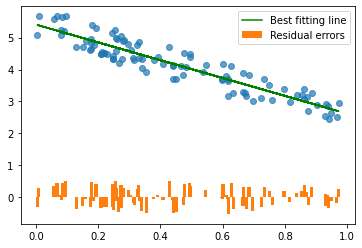

In [4]:
w_1, w_0 = np.polyfit(x[:, 0], y[:, 0], deg=1)
print(f"Best fitting line: y_hat = {w_0} + {w_1}*x")

plt.scatter(x, y, alpha=0.7)
plt.plot(x, w_0 + w_1 * x, color="green", label="Best fitting line")

residuals = y - (w_0 + w_1 * x)
plt.bar(x[:, 0], residuals[:, 0], width=0.01, label="Residual errors")

plt.legend();

Each observed data point will have a residual. The goal of finding a best fitting line is to minimize these residuals by picking the right $w_0$ and $w_1$. This goal can be formulate as follows:

$$\underset{w_0, w_1}{argmin}\mathcal{L}(w_0, w_1)$$

where $\mathcal{L}(w_0, w_1)$ can be the sum of the squared residual errors (or **least squares criterion**).

$$\mathcal{L}(w_0, w_1) = \frac{1}{2}\sum^m_{i=1}(y^{(i)} - \hat{y}^{(i)})^2$$

where $m$ is the number of observed data points. $\mathcal{L}$ is also called the loss function.

## Multiple Linear Regression

In machine learning, we will generally have various input variables to determine the outcome. In such cases, we will use Multiple Linear Regression to model the relationship between a depedent $y$ variable and $n$ $x$-variables, the equation is written as:

$$y \approx \hat{y} = w_0 + w_1 x_1 + ... + w_j x_j + ... + w_n x_n$$

where, $w_0, w_1, ..., w_n$ are the coefficients. In machine learning, $w_0$ is commonly known as *bias*, $w_1, ..., w_n$ is commonly known as *model weights*.

The above equation can be visualize as a plane or hyper-plane in higher dimensions.

Shape of x_1: (100, 1)
The first 5 rows of x_1: [[0.22733602]
 [0.31675834]
 [0.79736546]
 [0.67625467]
 [0.39110955]]

Shape of x_2: (100, 1)
The first 5 rows of x: [[0.16862884]
 [0.24014406]
 [0.78000786]
 [0.2037676 ]
 [0.55205095]]

Shape of y: (100, 1)
The first 5 rows of y: [[4.14508326]
 [4.19477479]
 [8.51186103]
 [5.25143071]
 [6.91475693]]


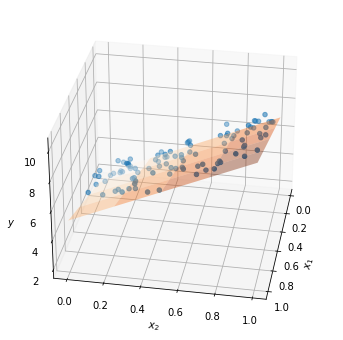

In [5]:
num_data_points = 100

# get a new instance of random numbers generator
rng = np.random.default_rng(seed=12345)

# generate x_1 and x_2
x_1 = rng.random(size=(num_data_points, 1))
x_2 = rng.random(size=(num_data_points, 1))

# initialize w_0, w_1, and w_2
w_0, w_1, w_2 = 2, 3, 5

# compute y
y = (w_0 + w_1 * x_1 + w_2 * x_2) + rng.random(size=(num_data_points, 1))

print("Shape of x_1:", x.shape)
print("The first 5 rows of x_1:", x_1[:5])
print()
print("Shape of x_2:", x_2.shape)
print("The first 5 rows of x:", x_2[:5])
print()
print("Shape of y:", y.shape)
print("The first 5 rows of y:", y[:5])

fig = plt.figure(figsize=(8, 6))
axis = plt.axes(projection="3d")
axis.set_xlabel(r"$x_1$")
axis.set_ylabel(r"$x_2$")
axis.set_zlabel(r"$y$")
axis.scatter(x_1, x_2, y)

x_1_mesh, x_2_mesh = np.meshgrid(np.linspace(0, 1, 5), np.linspace(0, 1, 5))
y_hat_mesh = w_0 + w_1 * x_1_mesh + w_2 * x_2_mesh
axis.plot_surface(
    x_1_mesh,
    x_2_mesh,
    y_hat_mesh,
    cmap="Oranges",
    alpha=0.4,
)
axis.azim = 10
axis.elev = 30

Each $x_j$ variable can be an independent variable or a transformation of independent variables (such as the square of an independent variable or the multiplication of two independent variables). Allowing non-linear transformation of independent variables enables the Multiple Linear Regression to represent non-linear relationships between the dependent variable and independent variables.

### Matrix Formulation of Multiple Linear Regression

In the Multiple Linear Regression, because of the potentially large number of independent variables, it is more efficient to use matrices to define the regression model.

Let's start with the simple case first. Consider the following Simple Linear Regression function:

$$\hat{y}^{(i)} = w_0 + w_1 x^{(i)} \quad \text{for } i=1,...,m$$

where $m$ is the number of observed data points. If we let $i=1,...,m$, we can obtain $m$ equations:

$$
\hat{y}^{(1)} = w_0 + w_1 x^{(1)} \\
\hat{y}^{(2)} = w_0 + w_1 x^{(2)} \\
\vdots \\
\hat{y}^{(m)} = w_0 + w_1 x^{(m)}
$$

We can formulate the above Simple Linear Regression equations in matrix notation:

$$
\begin{bmatrix}
  \hat{y}^{(1)} \\
  \hat{y}^{(2)} \\
  \vdots \\
  \hat{y}^{(m)}
\end{bmatrix} =
  \begin{bmatrix}
    1 & x^{(1)} \\  
    1 & x^{(2)} \\
    \vdots \\
    1 & x^{(m)}
  \end{bmatrix} \begin{bmatrix}
    w_0 \\
    w_1
  \end{bmatrix}
$$

which, can be further reduce to a short and simple equation:

$$
  \pmb{\hat{y}} = \pmb{X}\pmb{w}
$$

where $\pmb{\hat{y}}$ is an $m \times 1$ column vector, $\pmb{X}$ is an $m \times 2$ matrix, and $\pmb{w}$ is a $2 \times 1$ column vector.

Using matrix notation, we can easily extend the above equation to Multiple Linear Regression with $n$ $x$-variables.

$$
\begin{align}
  \pmb{\hat{y}} &= \pmb{X}\pmb{w} \\
  \begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \vdots \\
    \hat{y}^{(m)}
  \end{bmatrix} &=
    \begin{bmatrix}
      1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_n \\  
      1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(1)}_n \\
      \vdots \\
      1 & x^{(m)}_1 & x^{(m)}_2 & \cdots & x^{(m)}_n
    \end{bmatrix} \begin{bmatrix}
      w_0 \\
      w_1 \\
      \vdots \\
      w_n
    \end{bmatrix}
\end{align}
$$

where $\pmb{\hat{y}}$ is an $m \times 1$ column vector, $\pmb{X}$ is an $m \times (n+1)$ matrix, and $\pmb{w}$ is a $(n+1) \times 1$ column vector.

### Estimate Bias and Weights

The goal of Linear Regression is to find a best fitting line by finding the values of $\pmb{w}$ parameters to minimize the loss function $\mathcal{L}(\pmb{w})$. The sum of squared residual errors is commonly used and formulated as follows:

$$
\begin{align}
  \mathcal{L}(\pmb{w}) &= \frac{1}{2}\sum^m_{i=1}(y^{(i)} - \hat{y}^{(i)})^2 \\
  &= \frac{1}{2} \lVert \pmb{y} - \pmb{\hat{y}} \lVert ^2
\end{align}
$$

Usually, we will perform an optimization algorithm (e.g., gradient descent) for finding the best $w$ parameters to minimize the loss function $\mathcal{L}(\pmb{w})$. You can learn about these algorithms in another course on our platform. In this course, we will solve this optimization problem in a different approach.

We further rewritten the loss function as follows:

$$
\begin{align}
  \mathcal{L}(\pmb{w}) &= \frac{1}{2} (\pmb{y} - \pmb{\hat{y}})^\top (\pmb{y} - \pmb{\hat{y}}) \\
  &= \frac{1}{2} (\pmb{y}^\top \pmb{y} - 2 \pmb{y}^\top \pmb{\hat{y}}
    + \pmb{\hat{y}}^\top \pmb{\hat{y}}) \\
  &= \frac{1}{2} (\pmb{y}^\top \pmb{y} - 2 \pmb{y}^\top \pmb{X} \pmb{w}
    + \pmb{X}^\top \pmb{w}^\top \pmb{X} \pmb{w}) \\
\end{align}
$$

Since the loss function is convex, the best $\pmb{w}$ lies at gradient zero. Therefore, to minimize $\mathcal{L}(\pmb{w})$, we set its partial derivative with respect to $\pmb{w}$ to 0. The solution satisfies:

$$
\begin{align}
  &\frac{\partial}{\partial \pmb{w}} \mathcal{L}(\pmb{w}) &= &0 \\
  \Leftrightarrow  &\frac{1}{2} (- 2 \pmb{y}^\top \pmb{X} + 2 \pmb{X}^\top \pmb{X} \pmb{w}) &= & 0 \\
  \Leftrightarrow  &\pmb{X}^\top \pmb{X} \pmb{w} &= &\pmb{X}^\top \pmb{y} \\
  \Leftrightarrow  &\pmb{w} &= &(\pmb{X}^\top \pmb{X})^{-1} \pmb{X}^\top \pmb{y}
\end{align}
$$

The optimization problem is solved! We now have an equation that can help us compute $\pmb{w}$ parameters directly from the observed data. The equation is also known as the normal equation.

$$\pmb{w} = (\pmb{X}^\top \pmb{X})^{-1} \pmb{X}^\top \pmb{y} $$


Congratulation! You now have a brief understanding of Linear Regression. Let's move 
to the next section where we will guide you on how to utilize the normal equation to implement a Linear Regression model by yourself.